<a href="https://colab.research.google.com/github/JackyPro/AI_Course/blob/main/Day2/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.設定：複製一份程式到自己的雲端上，並且開啟副本

<table>
  <tr>
    <td bgcolor=#ccffcc>
      <center><img src="https://github.com/JackyPro/DL_imageclassification/raw/a26c0994e0caf0eac7fb219cdd95f235ded65cc4/img/1.png" width=70%>
      </center>
      <center><font size="6">Step 1<br /><br /></font></center> 
    </td>
  </tr>
  <tr>
    <td bgcolor=#D1EEEE>
      <center>
        <img src="https://github.com/JackyPro/DL_imageclassification/raw/a26c0994e0caf0eac7fb219cdd95f235ded65cc4/img/2.png" width=70%>
      </center>
      <center>
        <font size="6">Step 2<br /><br /></font>
        <font size="4">確認是否為副本<br />
        若為副本，代表程式檔已經複製在自己的雲端<br />
        可以自行修改檔名<br /><br /></font>
      </center> 
    </td>
  </tr>
  <tr>
    <td bgcolor=#ffffcc>
      <center><img src="https://github.com/JackyPro/DL_imageclassification/raw/a26c0994e0caf0eac7fb219cdd95f235ded65cc4/img/3.png" width=70%>
      </center>
      <center><font size="6">Step 3<br /><br /></font></center> 
    </td>
  </tr>
</table>



# 2.Envs

In [1]:
from tensorflow.python.client import device_lib
print (device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7385828045792049562
]


In [2]:
import platform
import tensorflow
import tensorflow.keras
print("Platform: {}".format(platform.platform()))
print("Tensorflow version: {}".format(tensorflow.__version__))
print("Keras version: {}".format(tensorflow.keras.__version__))

Platform: Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic
Tensorflow version: 2.6.0
Keras version: 2.6.0


In [3]:
!python -V
platform.python_version()

Python 3.7.11


'3.7.11'

In [4]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"  
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [5]:
import warnings
warnings.filterwarnings("ignore")

# Task1: multi-class classification with sklearn dataset - digits  
Logistic Regression model

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

## Load dataset

In [7]:
digits = datasets.load_digits()#导入digits数据集

In [8]:
digits.keys()#查看digits中有哪些属性

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [9]:
digits.data.shape

(1797, 64)

In [10]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

## view raw images

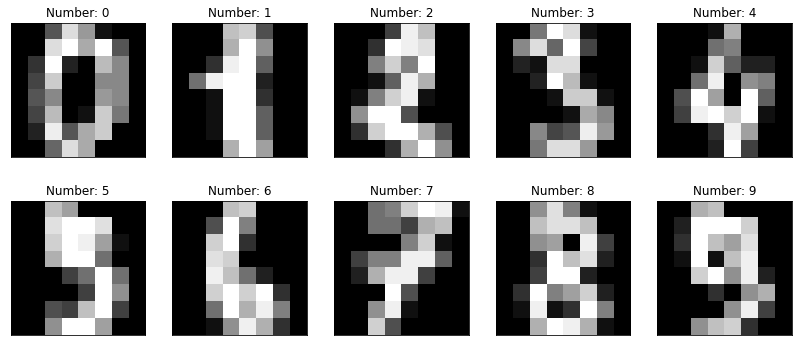

In [11]:
num_rows = 2
num_cols = 5
num_images = num_rows*num_cols
n_size = 2
#plt.figure(figsize=(n_size*n_size*num_cols, n_size*num_rows))
plt.figure(figsize=(14, 6))
for i in range(0, num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(digits.images[i], cmap='gray', interpolation=None)
    plt.title("{} {}".format( str("Number:"), digits.target[i] ),color = 'black')
plt.show()

In [12]:
x = digits.data   ##获得数据集中的输入
y = digits.target ##获得数据集中的输出，即标签(也就是类别)

## data splitting(8:2)

In [13]:
# Splitting data into 80% training and 20% test data
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=1, stratify=y)

## Std

In [14]:
# Standardizing the features
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

## Training

In [15]:
mlp1 = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, random_state=1,
                    learning_rate_init=.1)
mlp1.fit(x_train_std, y_train)

Iteration 1, loss = 1.66440322
Iteration 2, loss = 0.35623737
Iteration 3, loss = 0.15969254
Iteration 4, loss = 0.09841690
Iteration 5, loss = 0.06892873
Iteration 6, loss = 0.05171750
Iteration 7, loss = 0.04083126
Iteration 8, loss = 0.03420211
Iteration 9, loss = 0.02875194
Iteration 10, loss = 0.02443737


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50,), learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=10, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=10, warm_start=False)

## Predict

In [16]:
y_pred = mlp1.predict(x_test_std)

In [17]:
y_pred_proba = mlp1.predict_proba(x_test_std)

### Accuracy

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print('accuracy score: ', accuracy_score(y_test, y_pred).round(3))

accuracy score:  0.967


### Confusion Matrix

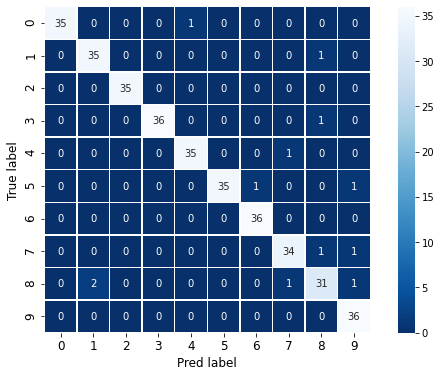

In [19]:
cm = confusion_matrix(y_test, y_pred)
#print(cm)

target_names = np.arange(0, 10, 1)
conf_m = pd.DataFrame(
                        cm,
                        index = target_names,
                        columns = target_names
                        )
fig, ax = plt.subplots(figsize = (10, 6))

sns.heatmap(
            conf_m, annot=True, annot_kws={"size": 10},
            cmap='Blues_r',
            fmt='g', linewidth=0.5, square=True
            )
plt.ylabel('True label', fontsize=12)
plt.xlabel('Pred label', fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
#plt.savefig('cm.png', bbox_inches='tight')
plt.show()

### other metrics

In [20]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.95      0.97      0.96        36
           2       1.00      1.00      1.00        35
           3       1.00      0.97      0.99        37
           4       0.97      0.97      0.97        36
           5       1.00      0.95      0.97        37
           6       0.97      1.00      0.99        36
           7       0.94      0.94      0.94        36
           8       0.91      0.89      0.90        35
           9       0.92      1.00      0.96        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



### Take a view - testing image (a few)

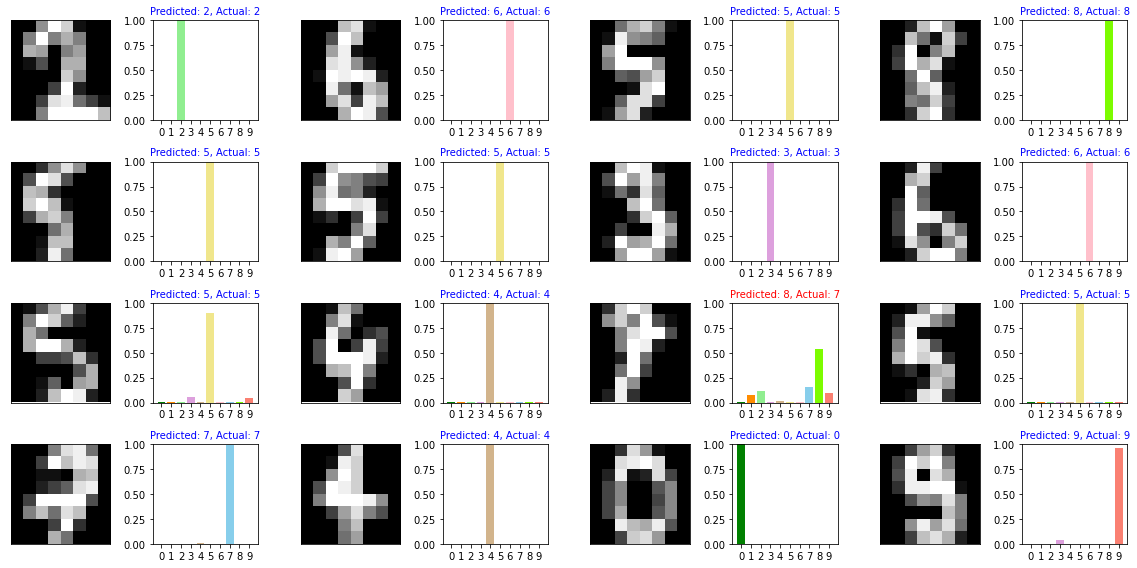

In [21]:
num_rows = 4
num_cols = 4
num_images = num_rows*num_cols
n_size = 2
plt.figure(figsize=(n_size*n_size*num_cols, (n_size)*num_rows))
#plt.figure(figsize=(14, 6))
for i in range(0, num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.reshape(x_test[i], (8, 8)), cmap='gray', interpolation=None)
    
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plt.xticks(range(0, 10, 1))
    plt.ylim(0, 1)
    plt.bar( 
                range(0, 10, 1),
                y_pred_proba[i],
                color = ['g','darkorange','lightgreen','plum', 'tan',
                        'khaki', 'pink', 'skyblue','lawngreen','salmon'] 
            )
    if y_pred[i] == y_test[i]:
        color = 'blue'
    else:
        color = 'red'
    plt.title(
                'Predicted: {}, Actual: {}'.format(y_pred[i], y_test[i]), 
                fontsize = 10, 
                color = color
             )
plt.tight_layout()
plt.show()

### Take a view - testing image (mistake)

In [22]:
import numpy as np 
import matplotlib.pyplot as plt
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, y_pred):
    
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1   

Real:  5
Predict:  5


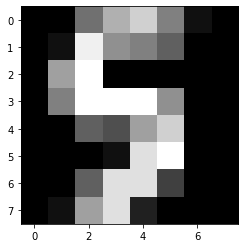

In [23]:
i = 2
plt.imshow(np.reshape( x_test[i], (8, 8)), cmap='gray', interpolation=None )
print('Real: ', y_test[i])
print('Predict: ', y_pred[i])

In [24]:
print(len(misclassifiedIndexes))
misclassifiedIndexes[0:5]

12


[10, 44, 47, 117, 144]

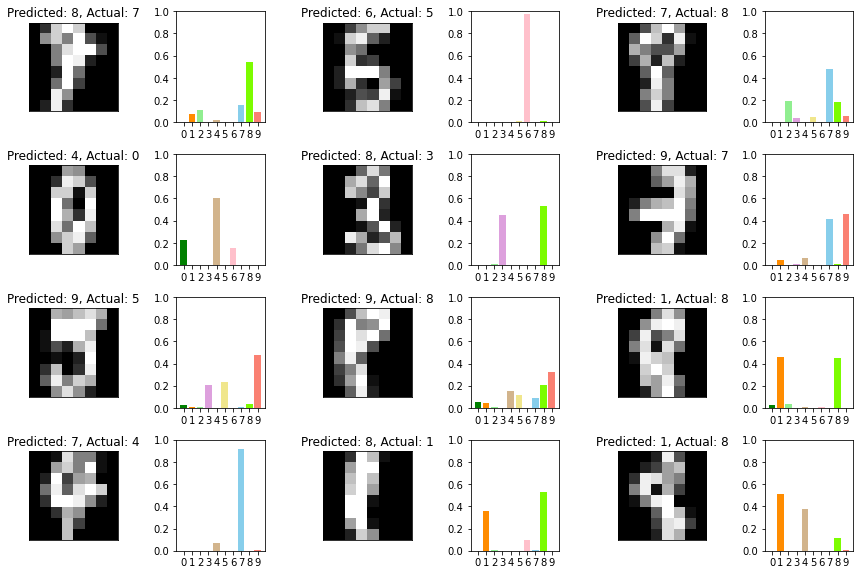

In [25]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
n_size = 2
plt.figure(figsize=(n_size*n_size*num_cols, n_size *num_rows))
#plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:num_images]):
    #plt.subplot(1, 5, plotIndex + 1)
    plt.subplot(num_rows, 2*num_cols, 2*plotIndex+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.reshape(x_test[badIndex], (8, 8)), cmap='gray', interpolation=None)
    plt.title('Predicted: {}, Actual: {}'.format(y_pred[badIndex],y_test[badIndex]), fontsize = 12)
    
    plt.subplot(num_rows, 2*num_cols, 2*plotIndex+2)
    plt.xticks(range(0, 10, 1))
    plt.ylim(0, 1)
    plt.bar( 
                range(0, 10, 1),
                y_pred_proba[badIndex],
                color = ['g','darkorange','lightgreen','plum', 'tan',
                        'khaki', 'pink', 'skyblue','lawngreen','salmon']  
            )
plt.tight_layout()
plt.show()

---

# Task2: multi-class classification with Mnist

## Load dataset

In [26]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784")

In [27]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [28]:
mnist.data.shape

(70000, 784)

In [29]:
mnist['data']

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## view raw images

In [33]:
mnist['data'][0].shape

(784,)

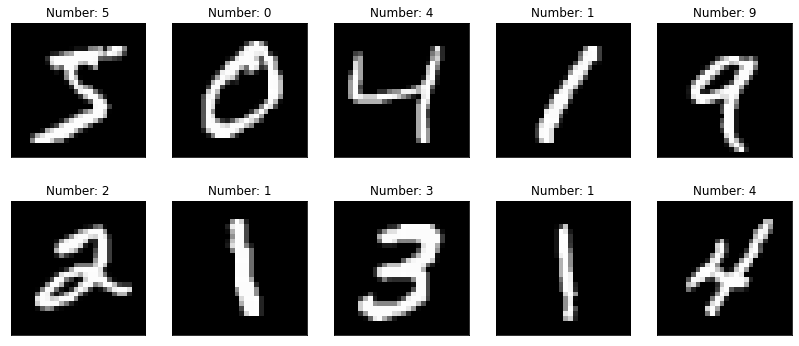

In [35]:
num_rows = 2
num_cols = 5
num_images = num_rows*num_cols
n_size = 2
#plt.figure(figsize=(n_size*n_size*num_cols, n_size*num_rows))
plt.figure(figsize=(14, 6))
for i in range(0, num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(mnist['data'][i].reshape(28, 28), cmap='gray', interpolation=None)
    plt.title("{} {}".format( str("Number:"), mnist['target'][i] ),color = 'black')
plt.show()

In [36]:
x = mnist['data']
y = mnist['target'].astype(int)

## normalization

In [37]:
x_norm = x/255

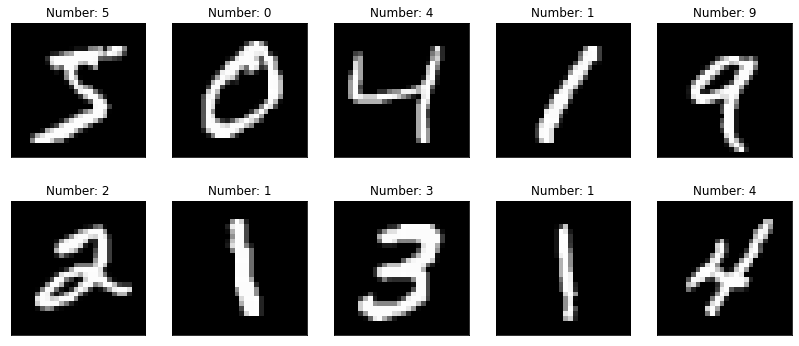

In [38]:
num_rows = 2
num_cols = 5
num_images = num_rows*num_cols
n_size = 2
#plt.figure(figsize=(n_size*n_size*num_cols, n_size*num_rows))
plt.figure(figsize=(14, 6))
for i in range(0, num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_norm[i].reshape(28, 28), cmap='gray', interpolation=None)
    plt.title("{} {}".format( str("Number:"), mnist['target'][i] ),color = 'black')
plt.show()

In [46]:
x_norm[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## data splitting(8:2)

In [47]:
# Splitting data into 80% training and 20% test data
x_train, x_test, y_train, y_test = train_test_split(
    x_norm, y, test_size=0.2, random_state=1, stratify=y)

In [48]:
#x_, x__, y_, y__ = train_test_split(
#    x, y, test_size=0.9, random_state=1, stratify=y)
#x_train, x_test, y_train, y_test = train_test_split(
#    x_, y_, test_size=0.5, random_state=1, stratify=y_)

In [49]:
print('x_train: ', x_train.shape)
print('x_train: ', y_train.shape)
print('x_test : ', x_test.shape)
print('y_test : ', y_test.shape)

x_train:  (56000, 784)
x_train:  (56000,)
x_test :  (14000, 784)
y_test :  (14000,)


## Std

In [50]:
# Standardizing the features
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

## Training

In [51]:
mlp2 = MLPClassifier(
                        hidden_layer_sizes=(50), 
                        max_iter=10, 
                        alpha=1e-4,
                        solver='sgd', 
                        verbose=10, 
                        random_state=1,
                        learning_rate_init=.1,
                    )
mlp2.fit(x_train, y_train)

Iteration 1, loss = 0.32773771
Iteration 2, loss = 0.15567672
Iteration 3, loss = 0.11596356
Iteration 4, loss = 0.09448018
Iteration 5, loss = 0.08062504
Iteration 6, loss = 0.06930390
Iteration 7, loss = 0.06187657
Iteration 8, loss = 0.05592639
Iteration 9, loss = 0.05084232
Iteration 10, loss = 0.04457103


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=50, learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=10, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=10, warm_start=False)

## Predict

In [52]:
y_pred = mlp2.predict(x_test)

In [53]:
y_pred_proba = mlp2.predict_proba(x_test)

### Accuracy

In [54]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print(accuracy_score(y_test, y_pred))

0.9692857142857143


### Confusion Matrix

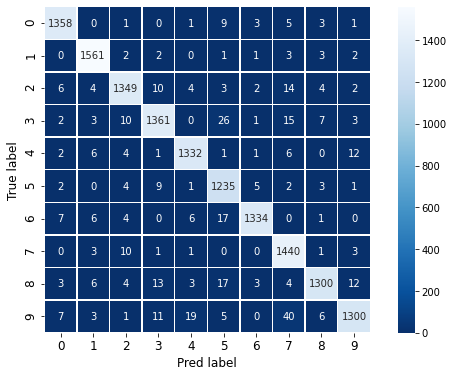

In [55]:
cm = confusion_matrix(y_test, y_pred)
#print(cm)

target_names = np.arange(0, 10, 1)
conf_m = pd.DataFrame(
                        cm,
                        index = target_names,
                        columns = target_names
                        )
fig, ax = plt.subplots(figsize = (10, 6))

sns.heatmap(
            conf_m, annot=True, annot_kws={"size": 10},
            cmap='Blues_r',
            fmt='g', linewidth=0.5, square=True
            )
plt.ylabel('True label', fontsize=12)
plt.xlabel('Pred label', fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
#plt.savefig('cm.png', bbox_inches='tight')
plt.show()

### other metrics

In [56]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1381
           1       0.98      0.99      0.99      1575
           2       0.97      0.96      0.97      1398
           3       0.97      0.95      0.96      1428
           4       0.97      0.98      0.98      1365
           5       0.94      0.98      0.96      1262
           6       0.99      0.97      0.98      1375
           7       0.94      0.99      0.96      1459
           8       0.98      0.95      0.97      1365
           9       0.97      0.93      0.95      1392

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



### Take a view - testing image (a few)

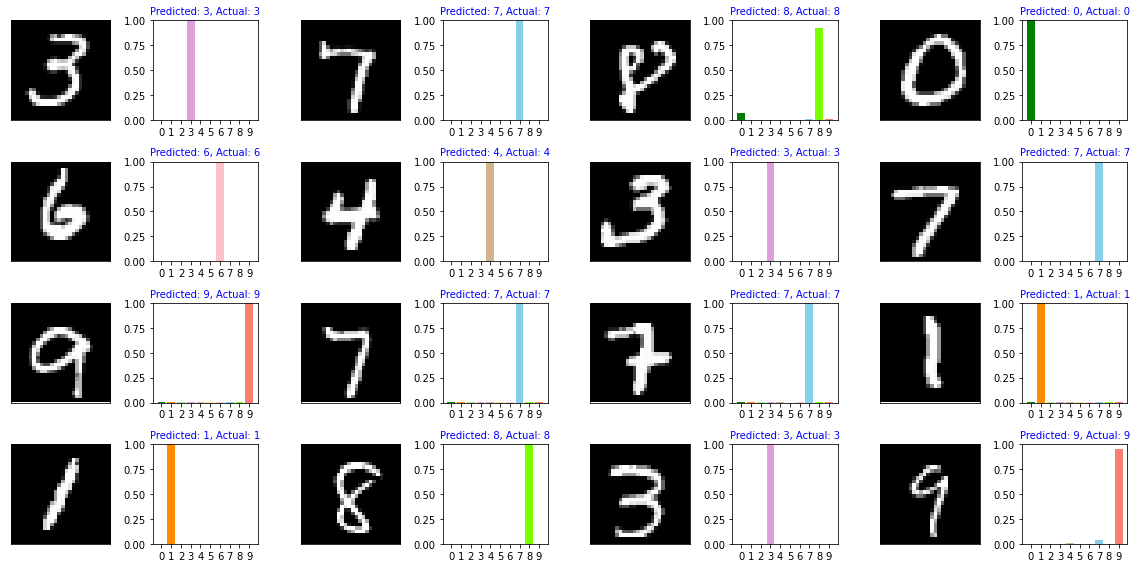

In [57]:
num_rows = 4
num_cols = 4
num_images = num_rows*num_cols
n_size = 2
plt.figure(figsize=(n_size*n_size*num_cols, (n_size)*num_rows))
#plt.figure(figsize=(14, 6))
for i in range(0, num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.reshape(x_test[i], (28, 28)), cmap='gray', interpolation=None)
    
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plt.xticks(range(0, 10, 1))
    plt.ylim(0, 1)
    plt.bar( 
                range(0, 10, 1),
                y_pred_proba[i],
                color = ['g','darkorange','lightgreen','plum', 'tan',
                        'khaki', 'pink', 'skyblue','lawngreen','salmon'] 
            )
    if y_pred[i] == y_test[i]:
        color = 'blue'
    else:
        color = 'red'
    plt.title(
                'Predicted: {}, Actual: {}'.format(y_pred[i], y_test[i]), 
                fontsize = 10, 
                color = color
             )
plt.tight_layout()
plt.show()

### Take a view - testing image (mistake)

In [58]:
import numpy as np 
import matplotlib.pyplot as plt
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, y_pred):
    
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1   

In [59]:
print(len(misclassifiedIndexes))
misclassifiedIndexes[0:5]

430


[47, 48, 64, 74, 116]

Real:  8
Predict:  8


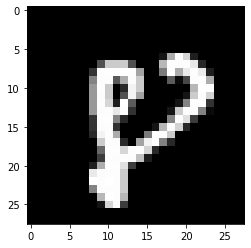

In [60]:
i = 2
plt.imshow(np.reshape( x_test[i], (28, 28)), cmap='gray', interpolation=None)
print('Real: ', y_test[i])
print('Predict: ', y_pred[i])

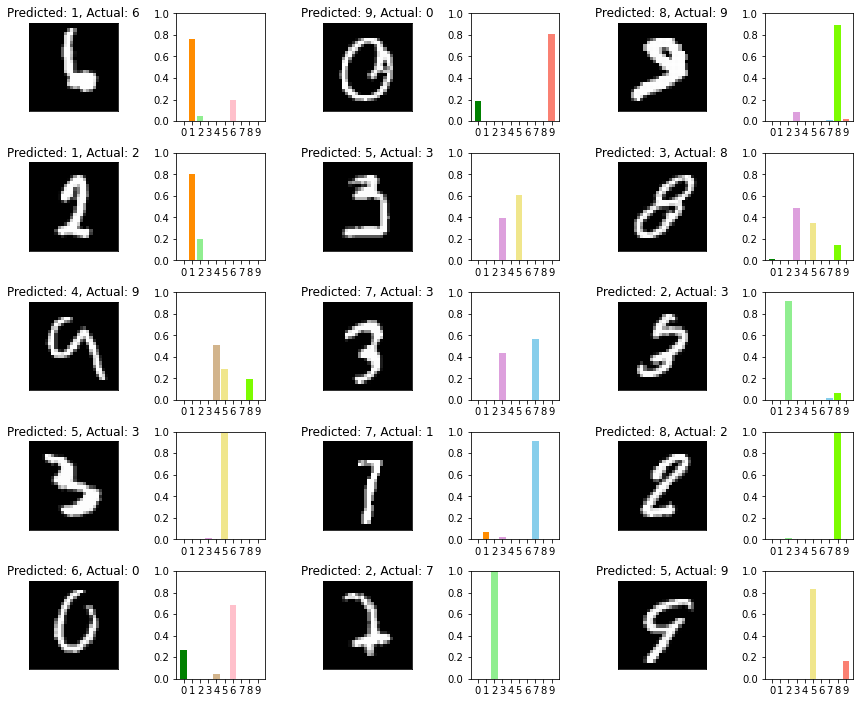

In [62]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
n_size = 2
plt.figure(figsize=(n_size*n_size*num_cols, n_size *num_rows))
#plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:num_images]):
    #plt.subplot(1, 5, plotIndex + 1)
    plt.subplot(num_rows, 2*num_cols, 2*plotIndex+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.reshape(x_test[badIndex], (28, 28)), cmap='gray', interpolation=None)
    plt.title('Predicted: {}, Actual: {}'.format(y_pred[badIndex], y_test[badIndex]), fontsize = 12)
    
    plt.subplot(num_rows, 2*num_cols, 2*plotIndex+2)
    plt.xticks(range(0, 10, 1))
    plt.ylim(0, 1)
    plt.bar( 
                range(0, 10, 1),
                y_pred_proba[badIndex],
                color = ['g','darkorange','lightgreen','plum', 'tan',
                        'khaki', 'pink', 'skyblue','lawngreen','salmon']  
            )
plt.tight_layout()
plt.show()

In [63]:
print(mlp2.coefs_[0].shape, mlp2.intercepts_[0].shape)
print(mlp2.coefs_[1].shape, mlp2.intercepts_[1].shape)

(784, 50) (50,)
(50, 10) (10,)


## Inference

In [ ]:
from google.colab import files
uploaded = files.upload()

In [86]:
image_path = './testing_image.png'
image_shape = (28, 28)

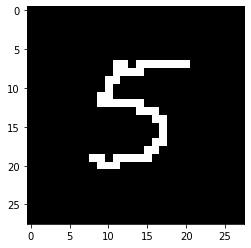

In [87]:
from PIL import Image
image = Image.open(image_path)
image = image.resize(image_shape)
plt.imshow(image, cmap='gray', interpolation=None)
plt.show()

In [88]:
image_np = np.array(image)
image_np = image_np/255
image_np = image_np[:,:,0]

In [89]:
image_np.shape

(28, 28)

In [90]:
image_np

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
        1., 1., 1., 1., 1

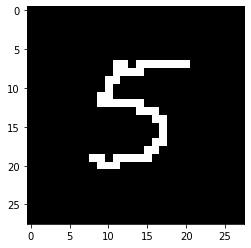

In [91]:
plt.imshow(image_np, cmap='gray', interpolation=None)
plt.show()

In [92]:
img_test = np.reshape(image_np,(1, 784))

In [93]:
img_test.shape

(1, 784)

In [94]:
y_test_img = mlp2.predict(img_test)

ML: It is number : 5


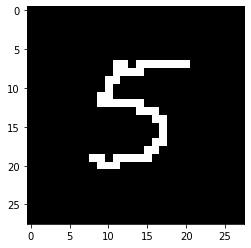

In [95]:
print('ML: It is number :',y_test_img[0])
plt.imshow(image_np, cmap='gray', interpolation=None)
plt.show()